In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [139]:
df = pd.read_csv('data.csv')

In [140]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [141]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [142]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

<Axes: xlabel='shot_distance', ylabel='Count'>

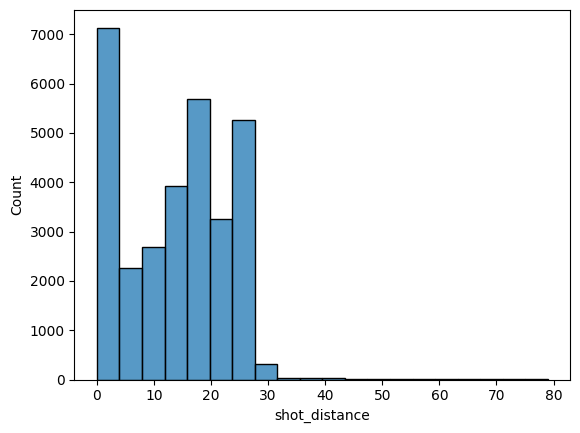

In [143]:
sns.histplot(x='shot_distance',data=df,bins=20)

<Axes: xlabel='loc_x', ylabel='loc_y'>

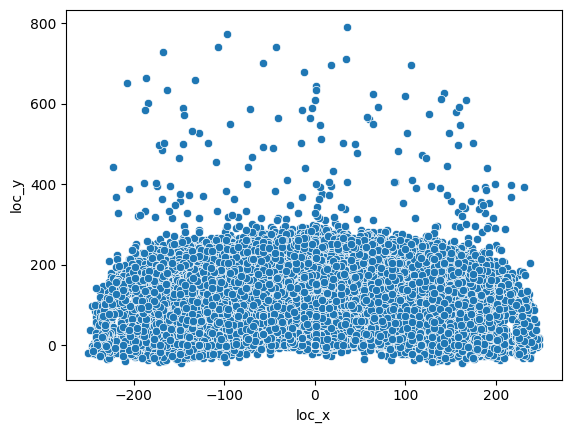

In [144]:
sns.scatterplot(x='loc_x',y='loc_y',data=df)

Text(0.5, 1.0, 'lat and lon')

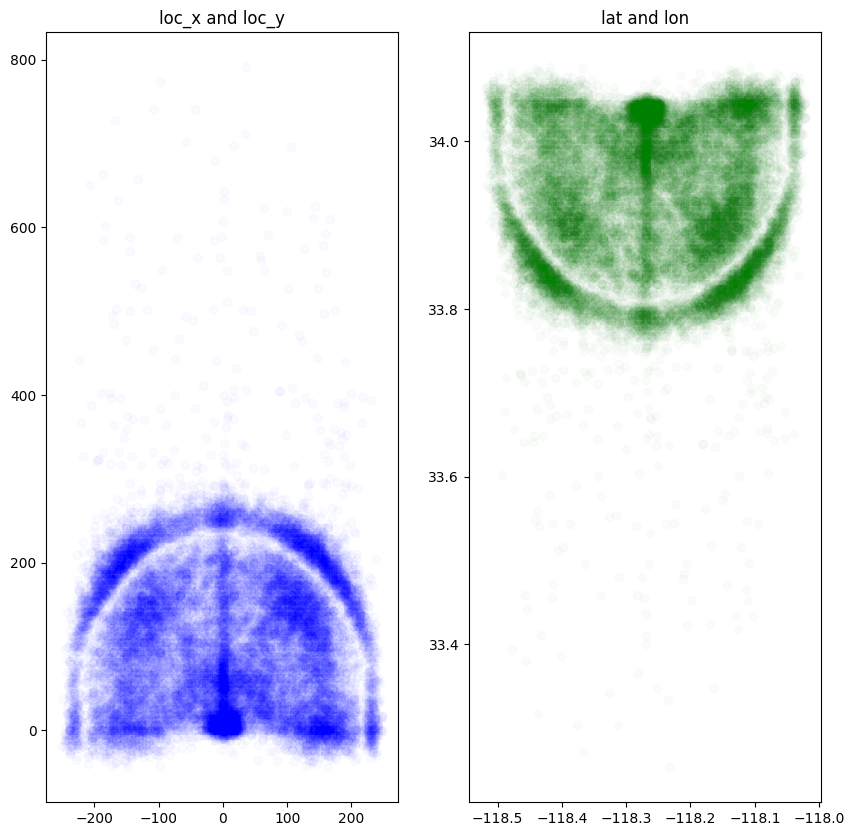

In [145]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(df.loc_x, df.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(df.lon, df.lat, color='green', alpha=alpha)
plt.title('lat and lon')

In [146]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

<Axes: xlabel='shot_zone_area', ylabel='count'>

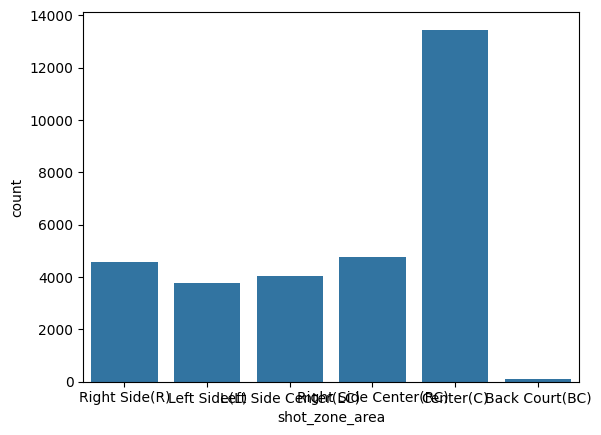

In [147]:
sns.countplot(x='shot_zone_area',data=df)

In [148]:
bySeason = df.groupby('season').count()

<Axes: xlabel='season', ylabel='shot_made_flag'>

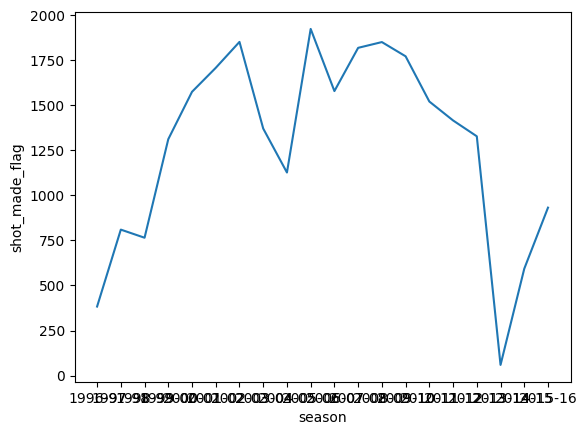

In [149]:
sns.lineplot(x='season',y='shot_made_flag',data=bySeason)

In [150]:
byOpp = df.groupby('opponent').count()

<Axes: xlabel='opponent', ylabel='shot_made_flag'>

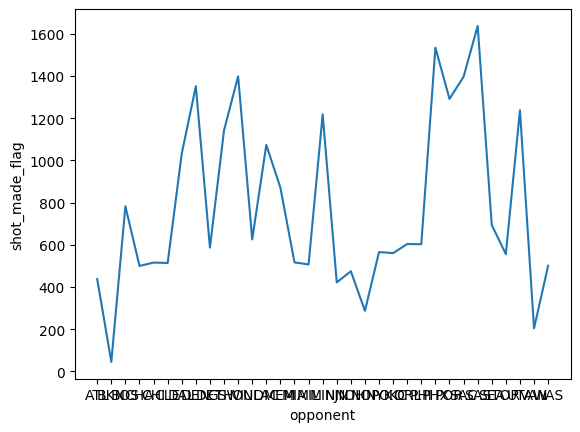

In [151]:
sns.lineplot(x='opponent',y='shot_made_flag',data=byOpp)

In [152]:
nulldf = df[df['shot_made_flag'].isnull()]

In [153]:
df2 = df.select_dtypes(include=['number'])
df2.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


<Axes: >

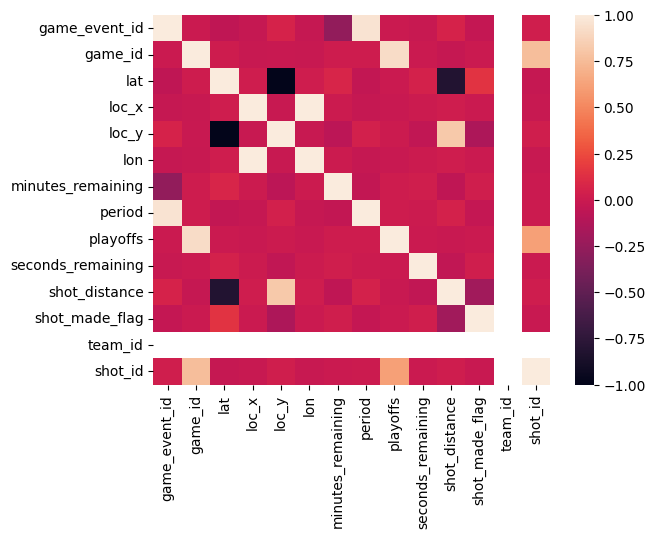

In [154]:
sns.heatmap(df2.corr())

In [155]:
corr = df2.corr()
corr['shot_made_flag']

game_event_id       -0.037232
game_id             -0.001612
lat                  0.148070
loc_x               -0.000848
loc_y               -0.148070
lon                 -0.000848
minutes_remaining    0.028342
period              -0.032152
playoffs            -0.001257
seconds_remaining    0.030804
shot_distance       -0.198242
shot_made_flag       1.000000
team_id                   NaN
shot_id             -0.013016
Name: shot_made_flag, dtype: float64

In [156]:
dfnotnull = df[df['shot_made_flag'].notnull()]

In [157]:
dfnotnull.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [158]:
dfnotnull.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [159]:
X = dfnotnull[['action_type', 'combined_shot_type', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
        'seconds_remaining', 'shot_distance',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       ]]

In [127]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply to the 'shot_zone_area' column, for example
X['action_type'] = label_encoder.fit_transform(X['action_type'])
X['combined_shot_type'] = label_encoder.fit_transform(X['combined_shot_type'])
X['shot_zone_area'] = label_encoder.fit_transform(X['shot_zone_area'])
X['shot_zone_basic'] = label_encoder.fit_transform(X['shot_zone_basic'])
X['shot_zone_range'] = label_encoder.fit_transform(X['shot_zone_range'])
X['shot_type'] = label_encoder.fit_transform(X['shot_type'])





/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_49919/3210286670.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['action_type'] = label_encoder.fit_transform(X['action_type'])
/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_49919/3210286670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['combined_shot_type'] = label_encoder.fit_transform(X['combined_shot_type'])
/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_49919/3210286670.py:9: SettingWithCopyWarning: 
A val

In [128]:
y = dfnotnull['shot_made_flag']

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc = RandomForestClassifier()

In [132]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [133]:
preds = rfc.predict(x_test)

In [135]:
from sklearn import metrics

print(metrics.classification_report(preds,y_test))
print('\n')
print(metrics.confusion_matrix(preds,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.65      0.70      5150
         1.0       0.47      0.63      0.54      2560

    accuracy                           0.64      7710
   macro avg       0.62      0.64      0.62      7710
weighted avg       0.67      0.64      0.65      7710



[[3325 1825]
 [ 958 1602]]


In [161]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


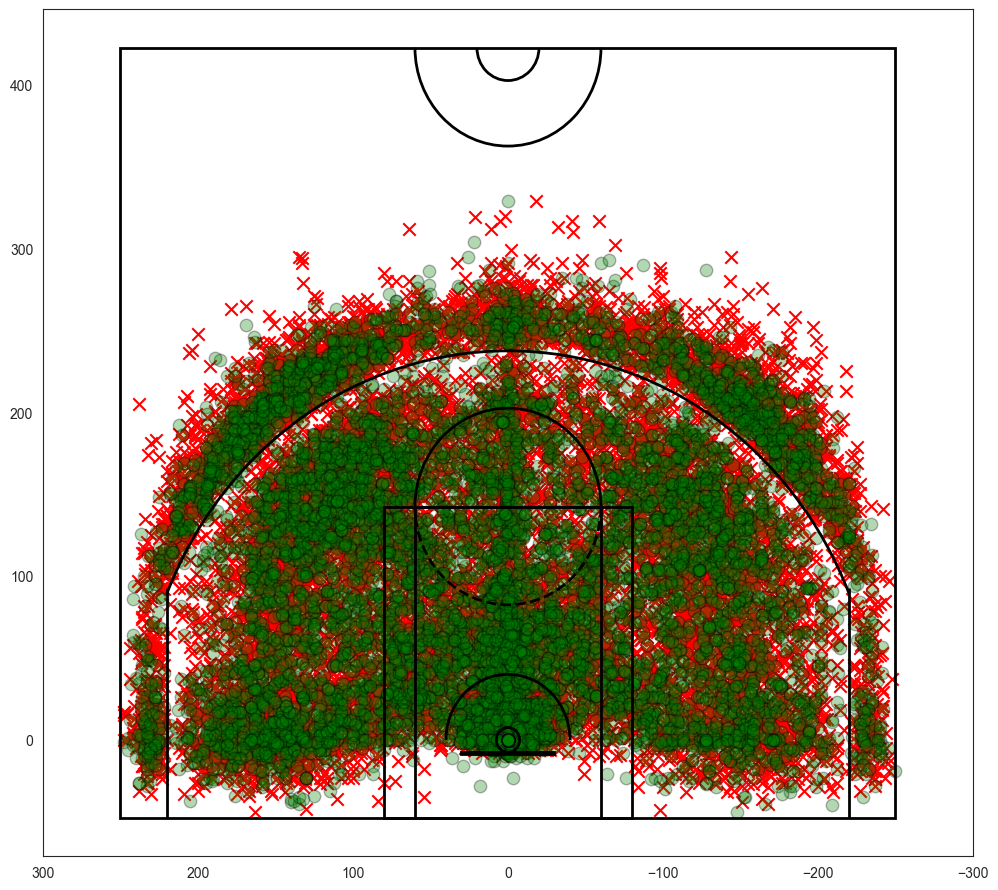

In [185]:
dfnofar = dfnotnull[dfnotnull['shot_distance'] <= 32]
plt.figure(figsize=(12,11))
dfmake = dfnofar[dfnofar['shot_made_flag'] == 1]
dfmiss = dfnofar[dfnofar['shot_made_flag'] == 0]
plt.scatter(dfmiss.loc_x, dfmiss.loc_y,c='red',marker ='x',s=80)
plt.scatter(dfmake.loc_x, dfmake.loc_y,c='green',marker='o',alpha=0.3,s=80,edgecolors='black')

draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()